## **PCA - Principal Component Analysis**
This works by identifying the hyperplane which lies closest to the data and then projects the data on that hyperplane while retaining most of the variation in the data set. It is very important to choose the right hyperplane so that when the data is projected onto it, it the maximum amount of information about how the original data is distributed.

#Using PCA for image compression
An image can be treated as a matrix - a grid of pixels, with values being the pixel intensities.
The basic steps we'll follow:

Apply PCA on the image matrix to reduce the dimensionality to a smaller number of principal components (PCs). This is lossy compression, as we are discarding some of the information.
To assess how much visual information we retained, we'll reconstruct the image from the limited number of PC.
We'll see how good the reconstructed images are for different number of selecte components.

In [ ]:
import numpy as np
from matplotlib.image import imread
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


(3024, 4032, 3)


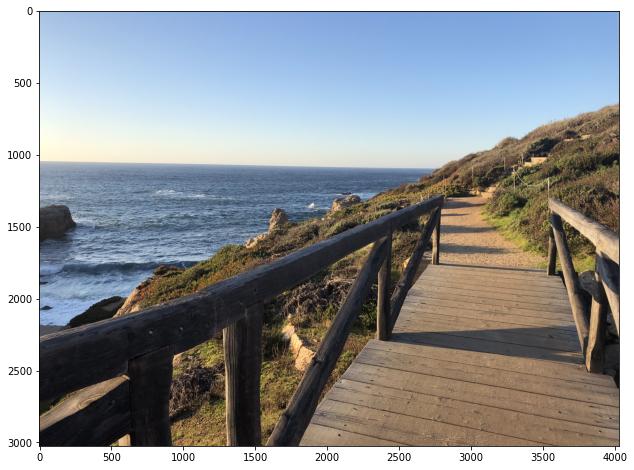

In [ ]:
image_raw = imread("/content/drive/MyDrive/Data Mining Assignment 1/sample.jpg")
print(image_raw.shape)

# Displaying the image
plt.figure(figsize=[12,8])
plt.imshow(image_raw)

About the image -
The image is a colour image i.e. has data in 3 channels- Red, Green, Blue.
Hence the shape of the data - 780 x 1040 x 3 - it is essentially is 780 x 1040 matrix for each channel.

While we could work with 3 channels, simply working with 3 matrices, for the purpose of demonstrating and for avoiding distraction from the core lesson, I'll convert the image to Black & White (greyscale, actually).

Converting to greyscale -

summing RGBs channel values for each pixel
capping values to 1
We'll plot the matrix as a greyscale image.

(3024, 4032)
1.0


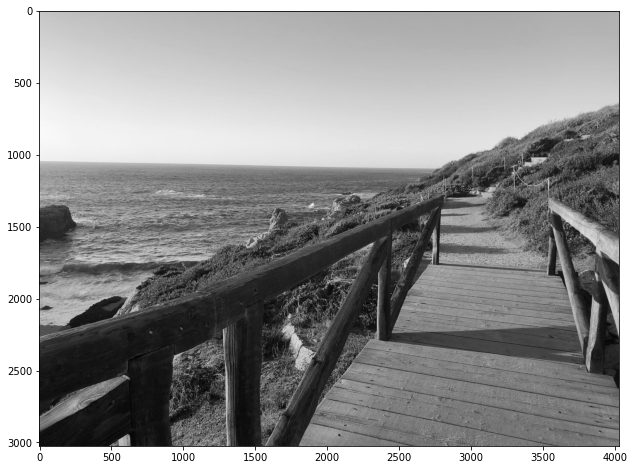

In [ ]:
image_sum = image_raw.sum(axis=2)
print(image_sum.shape)

image_bw = image_sum/image_sum.max()
print(image_bw.max())

plt.figure(figsize=[12,8])
plt.imshow(image_bw, cmap=plt.cm.gray)

#Performing PCA on the image
We'll perform PCA on the matrix with all the components
We'll then look at the scree-plot to assess how many components we could retain and how much cumulative variance they capture
We'll pick a suitable number of components to represent the image for compression

Number of components explaining 95% variance: 86


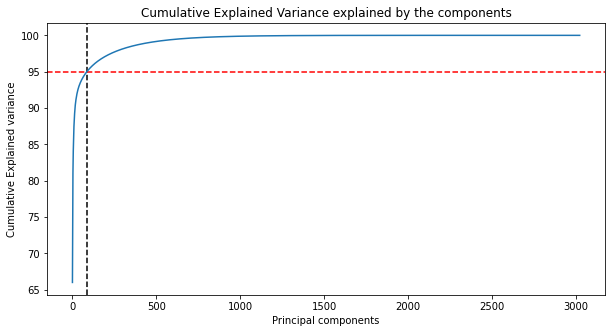

In [ ]:
from sklearn.decomposition import PCA, IncrementalPCA
pca = PCA()
pca.fit(image_bw)

# Getting the cumulative variance

var_cumu = np.cumsum(pca.explained_variance_ratio_)*100

# How many PCs explain 95% of the variance?
k = np.argmax(var_cumu>95)
print("Number of components explaining 95% variance: "+ str(k))
#print("\n")

plt.figure(figsize=[10,5])
plt.title('Cumulative Explained Variance explained by the components')
plt.ylabel('Cumulative Explained variance')
plt.xlabel('Principal components')
plt.axvline(x=k, color="k", linestyle="--")
plt.axhline(y=95, color="r", linestyle="--")
ax = plt.plot(var_cumu)

Looks like 86 components, instead of 784 pixels, can explain 95% of the variance in the image!
86 instead of 784 - whoah!

Let's reconstruct the image using only 86 components and see if the reconstructed image is visually very different from the original.

Reconstructing the b/w image with the limited number of components (86)
First, we'll use the fit_transform method from the IncrementalPCA module to first find the 86 PCs and transform and represent the data in those 86 new components/columns.
Next, we'll reconstruct the original matrix from these 86 components using the inverse_transform method.
We'll then plot the image to visually assess the quality of it.

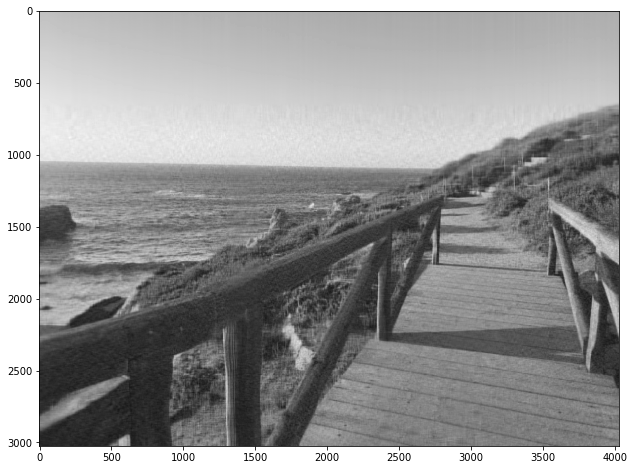

In [ ]:
ipca = IncrementalPCA(n_components=k)
image_recon = ipca.inverse_transform(ipca.fit_transform(image_bw))

# Plotting the reconstructed image
plt.figure(figsize=[12,8])
plt.imshow(image_recon,cmap = plt.cm.gray)

Well, for 95% variance, we expected a clearer image, didn't we? Note that we got all the major elements captured for sure - you can still very well identify objects.

What's missing is the clarity - well, maybe it's the finer details in the visuals that make an image appealing and clear.

Let's try out a different value of k - 150 components

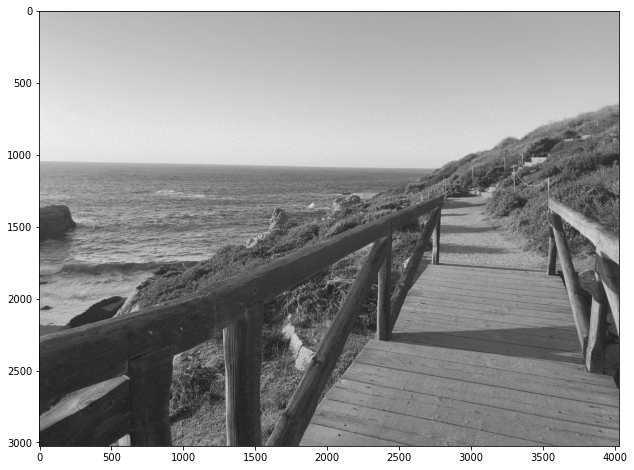

In [ ]:
# Function to reconstruct and plot image for a given number of components

def plot_at_k(k):
    ipca = IncrementalPCA(n_components=k)
    image_recon = ipca.inverse_transform(ipca.fit_transform(image_bw))
    plt.imshow(image_recon,cmap = plt.cm.gray)
    

k = 340
plt.figure(figsize=[12,8])
plot_at_k(300)

Much better! Just a little bit grainy, but the details are all there. On a smaller resolution, you probably won't be able to detect the differences from the original greyscale image very easily.

Reconstructing and plotting for different number of components
we'll try out different number of components, begining from 10, ending at 250
we'll reconstruct the image at each k and plot the images

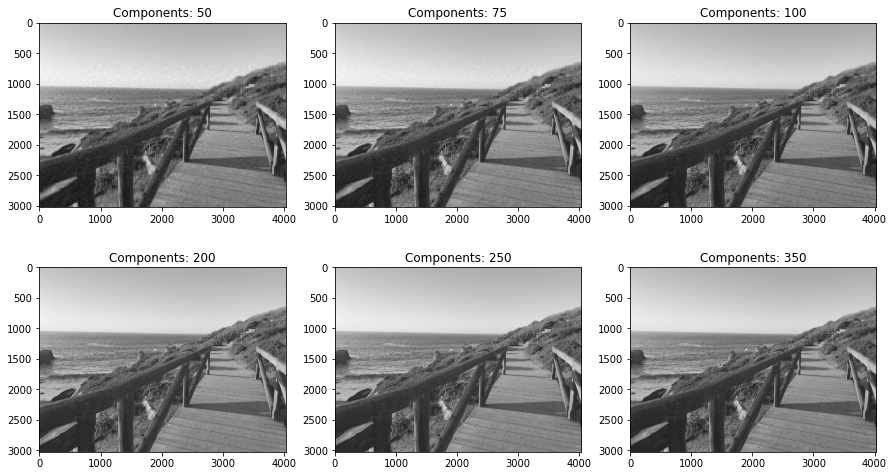

In [ ]:
ks = [50, 75, 100, 200, 250, 350]

plt.figure(figsize=[15,9])

for i in range(6):
    plt.subplot(2,3,i+1)
    plot_at_k(ks[i])
    plt.title("Components: "+str(ks[i]))

plt.subplots_adjust(wspace=0.2, hspace=0.0)
plt.show()

We'll looks like after 150, most of the reconstructed images are indistinguishable from the original greyscale. Even 150 components instead of 784 columns is significant compression.

Well, so that was it for a brief introduction to PCA. We saw how we can -

Implement PCA in python
Choose the number of components using a scree plot
Reconstruct the original data from the components
Now, PCA is not the only dimensionality reduction technique - there are plenty more. Some notable ones being -

ICA (Independent Component Analysis)
Manifold Learning (IsoMap, LLE)
t-SNE
These overcome some of the shortcomings of PCA, but there are tradeoffs.

PCA should be one technique that should be in the arsenal of every Data Scientist. While it does have some drawbacks, the idea of PCA is pretty powerful, and PCA is pretty much a ‘default’ method for several applications owing to its efficiency, elegant geometrical interpretation, and simplicity.

##**SVD**
Now we will explore how to apply Singular Value Decomposition of a matrix to the problem of image compression. SVD decomposes a rectangular matrix $M$ to a three parts. $M=U\Sigma V^T$ -

$U$ - matrix of left singular vectors in the columns
$\Sigma$ - diagonal matrix with singular values
$V$ - matrix of right singular vectors in the columns
SVD in effect involves reconstructing the original matrix as a linear combination of several rank one matrices. A rank one matrix can be expressed as a outer product of two column vectors.

$M=\sigma_1u_1v_1^T+\sigma_2u_2v_2^T+\sigma_3u_3v_3^T+\sigma_3u_3v_3^T+....$ . A matrix of rank r will have r terms of these.

Here $\sigma_1,\sigma_2,\sigma_3 ...$ are singular values. $u_1,u_2,u_3 ...$ and $v_1,v_2,v_3 ...$ are left and right singular vectors respectively.

Image compression using SVD involves taking advantage of the fact that very few of the singular values are large. Although images from the real world are of full rank, they have low effective rank which means that only few of the singular values of the SVD of images will be large.

In [ ]:
from skimage import data
from skimage.color import rgb2gray

import numpy as np
import matplotlib.pyplot as plt

In [ ]:
from skimage import img_as_ubyte,img_as_float
gray_images = {
        "cat":rgb2gray(img_as_float(data.chelsea())),
        "astro":rgb2gray(img_as_float(data.astronaut())),
        "rocket" : rgb2gray(img_as_float(data.rocket())),
        "camera":data.camera(),
        "clock":data.clock(),
        "coffee":rgb2gray(img_as_float(data.coffee()))

}

In [ ]:
from numpy.linalg import svd

In [ ]:
def compress_svd(image,k):
    """
    Perform svd decomposition and truncated (using k singular values/vectors) reconstruction
    returns
    --------
      reconstructed matrix reconst_matrix, array of singular values s
    """
    U,s,V = svd(image,full_matrices=False)
    reconst_matrix = np.dot(U[:,:k],np.dot(np.diag(s[:k]),V[:k,:]))
   
    return reconst_matrix,s


#Compress gray scale images
The function compress_show_gray_images below takes in the image name (img_name) and number of singular values/vectors(k) to be used in the compressed reconstruction. It also plots the singular values and the image.

In [ ]:
def compress_show_gray_images(img_name,k):
    """
     compresses gray scale images and display the reconstructed image.
     Also displays a plot of singular values
    """
    image=gray_images[img_name]
    original_shape = image.shape
    reconst_img,s = compress_svd(image,k)
    fig,axes = plt.subplots(1,2,figsize=(12,7))
    axes[0].plot(s)
    compression_ratio =100.0* (k*(original_shape[0] + original_shape[1])+k)/(original_shape[0]*original_shape[1])
    axes[1].set_title("compression ratio={:.2f}".format(compression_ratio)+"%")
    axes[1].imshow(reconst_img,cmap='gray')
    axes[1].axis('off')
    fig.tight_layout()

In [ ]:
from ipywidgets import interact,interactive,interact_manual
interact(compress_show_gray_images,img_name=list(gray_images.keys()),k=(1,300));

interactive(children=(Dropdown(description='img_name', options=('cat', 'astro', 'rocket', 'camera', 'coin', 'c…

In [ ]:
color_images = {
    "cat":img_as_float(data.chelsea()),
    "astro":img_as_float(data.astronaut()),
    "coffee":img_as_float(data.coffee())  
}

In [ ]:
def compress_show_color_images_reshape(img_name,k):
    """
     compress and display the reconstructed color image using the reshape method 
    """
    image = color_images[img_name]
    original_shape = image.shape
    image_reshaped = image.reshape((original_shape[0],original_shape[1]*3))
    image_reconst,_ = compress_svd(image_reshaped,k)
    image_reconst = image_reconst.reshape(original_shape)
    compression_ratio =100.0* (k*(original_shape[0] + 3*original_shape[1])+k)/(original_shape[0]*original_shape[1]*original_shape[2])
    plt.title("compression ratio={:.2f}".format(compression_ratio)+"%")
    plt.imshow(image_reconst)

In [ ]:
interact(compress_show_color_images_reshape,img_name=list(color_images.keys()),k=(0,512));

interactive(children=(Dropdown(description='img_name', options=('cat', 'astro', 'coffee'), value='cat'), IntSl…

#Layers method to compress color images¶
In the function compress_show_color_images_layer, we treat a color image as a stack of 3 seperate two dimensional images (Red,blue and green layers) . We apply the truncated svd reconstruction on each two dimensional layer seperately.

image_reconst_layers = [compress_svd(image[:,:,i],k)[0] for i in range(3)]

And we put back the reconstructed layers together.

image_reconst = np.zeros(image.shape)
for i in range(3):
   image_reconst[:,:,i] = image_reconst_layers[i]

In [ ]:
def compress_show_color_images_layer(img_name,k):
    """
     compress and display the reconstructed color image using the layer method 
    """
    image = color_images[img_name]
    original_shape = image.shape
    image_reconst_layers = [compress_svd(image[:,:,i],k)[0] for i in range(3)]
    image_reconst = np.zeros(image.shape)
    for i in range(3):
        image_reconst[:,:,i] = image_reconst_layers[i]
    
    compression_ratio =100.0*3* (k*(original_shape[0] + original_shape[1])+k)/(original_shape[0]*original_shape[1]*original_shape[2])
    plt.title("compression ratio={:.2f}".format(compression_ratio)+"%")
    
    plt.imshow(image_reconst)

In [ ]:
interact(compress_show_color_images_layer,img_name=list(color_images.keys()),k=(1,550));

interactive(children=(Dropdown(description='img_name', options=('cat', 'astro', 'coffee'), value='cat'), IntSl…

## Isomap 

One place manifold learning is often used is in understanding the relationship between high-dimensional data points.
A common case of high-dimensional data is images: for example, a set of images with 1,000 pixels each can be thought of as a collection of points in 1,000 dimensions – the brightness of each pixel in each image defines the coordinate in that dimension.

Here let's apply Isomap on some faces data.
We will use the Labeled Faces in the Wild dataset, which we previously saw in [In-Depth: Support Vector Machines](05.07-Support-Vector-Machines.ipynb) and [In Depth: Principal Component Analysis](05.09-Principal-Component-Analysis.ipynb).
Running this command will download the data and cache it in your home directory for later use:

In [ ]:
from sklearn.datasets import fetch_lfw_people
faces = fetch_lfw_people(min_faces_per_person=30)
faces.data.shape

(2370, 2914)

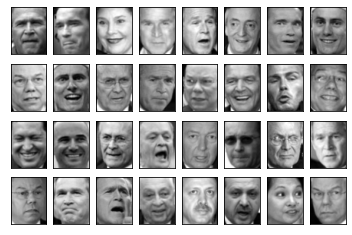

In [ ]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(4, 8, subplot_kw=dict(xticks=[], yticks=[]))
for i, axi in enumerate(ax.flat):
    axi.imshow(faces.images[i], cmap='gray')

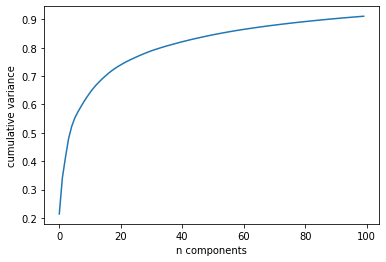

In [ ]:
from sklearn.decomposition import PCA as RandomizedPCA
#pca = RandomizedPCA(n_components=n_components, svd_solver='randomized', whiten=True).fit(X_train)
import numpy as np
model = RandomizedPCA(100).fit(faces.data)
plt.plot(np.cumsum(model.explained_variance_ratio_))
plt.xlabel('n components')
plt.ylabel('cumulative variance');

In [ ]:
from sklearn.manifold import Isomap
model = Isomap(n_components=2)
proj = model.fit_transform(faces.data)
proj.shape

/usr/local/lib/python3.7/dist-packages/sklearn/utils/extmath.py:530: RuntimeWarning: invalid value encountered in multiply
  v *= signs[:, np.newaxis]


(2370, 2)

In [ ]:
from matplotlib import offsetbox

def plot_components(data, model, images=None, ax=None,
                    thumb_frac=0.05, cmap='gray'):
    ax = ax or plt.gca()
    
    proj = model.fit_transform(data)
    ax.plot(proj[:, 0], proj[:, 1], '.k')
    
    if images is not None:
        min_dist_2 = (thumb_frac * max(proj.max(0) - proj.min(0))) ** 2
        shown_images = np.array([2 * proj.max(0)])
        for i in range(data.shape[0]):
            dist = np.sum((proj[i] - shown_images) ** 2, 1)
            if np.min(dist) < min_dist_2:
                # don't show points that are too close
                continue
            shown_images = np.vstack([shown_images, proj[i]])
            imagebox = offsetbox.AnnotationBbox(
                offsetbox.OffsetImage(images[i], cmap=cmap),
                                      proj[i])
            ax.add_artist(imagebox)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/extmath.py:530: RuntimeWarning: invalid value encountered in multiply
  v *= signs[:, np.newaxis]


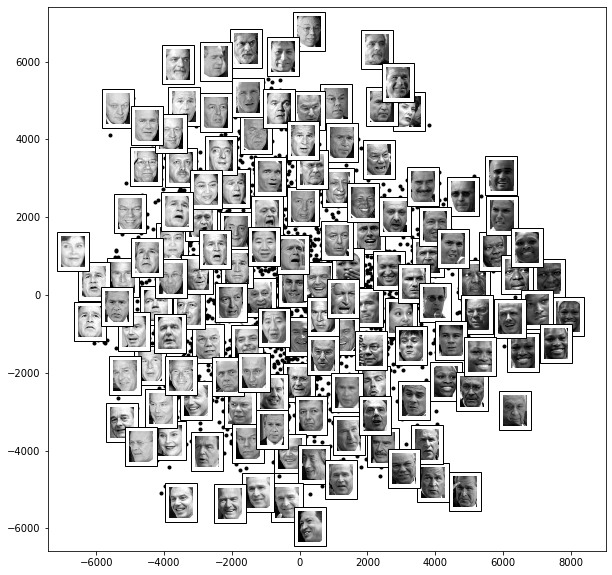

In [ ]:
fig, ax = plt.subplots(figsize=(10, 10))
plot_components(faces.data,
                model=Isomap(n_components=2),
                images=faces.images[:, ::2, ::2])

## **t-SNE** 

t-SNE takes a high dimensional data set and reduces it to a low dimensional graph that retains a lot of the original information. It does so by giving each data point a location in a two or three-dimensional map. This technique finds clusters in data thereby making sure that an embedding preserves the meaning in the data. t-SNE reduces dimensionality while trying to keep similar instances close and dissimilar instances apart.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
colors = ['royalblue','red','deeppink', 'maroon', 'mediumorchid', 'tan', 'forestgreen', 'olive', 'goldenrod', 'lightcyan', 'navy']
vectorizer = np.vectorize(lambda x: colors[x % len(colors)])

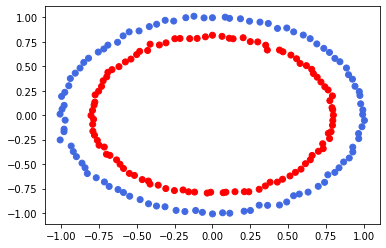

In [ ]:
from sklearn.datasets import make_circles
X, y = make_circles(n_samples=200, noise=0.01)
plt.scatter(X[:,0], X[:,1],c=vectorizer(y))

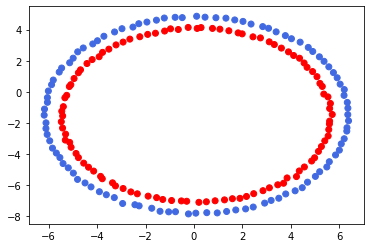

In [ ]:
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2,perplexity=40, random_state=42)
X_reduced_tsne = tsne.fit_transform(X)
plt.scatter(X_reduced_tsne[:,0], X_reduced_tsne[:,1],c=vectorizer(y))

In [ ]:
tsne = TSNE(n_components=2,perplexity=5, random_state=42)
X_5 = tsne.fit_transform(X)
tsne = TSNE(n_components=2,perplexity=30, random_state=42)
X_30 = tsne.fit_transform(X)
tsne = TSNE(n_components=2,perplexity=40, random_state=42)
X_40 = tsne.fit_transform(X)
tsne = TSNE(n_components=2,perplexity=100, random_state=42)
X_100 = tsne.fit_transform(X)

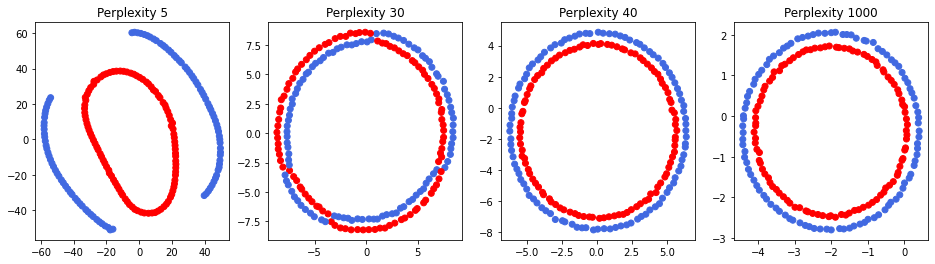

In [ ]:
plt.figure(figsize=(16, 4))
plt.subplot(141)
plt.gca().set_title('Perplexity 5')
plt.scatter(X_5[:,0], X_5[:,1],c=vectorizer(y))
plt.subplot(142)
plt.gca().set_title('Perplexity 30')
plt.scatter(X_30[:,0], X_30[:,1],c=vectorizer(y))
plt.subplot(143)
plt.gca().set_title('Perplexity 40')
plt.scatter(X_40[:,0], X_40[:,1],c=vectorizer(y))
plt.subplot(144)
plt.gca().set_title('Perplexity 1000')
plt.scatter(X_100[:,0], X_100[:,1],c=vectorizer(y))

#PCA and tSNE on MNIST

In [10]:
from __future__ import print_function
import time
import numpy as np
import pandas as pd
from sklearn.datasets import fetch_openml
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
%matplotlib inline
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns

In [13]:
X, y = fetch_openml('mnist_784', version=1, return_X_y=True, as_frame=False)
print(X.shape, y.shape)

(70000, 784) (70000,)


In [14]:
feat_cols = [ 'pixel'+str(i) for i in range(X.shape[1]) ]
df = pd.DataFrame(X,columns=feat_cols)
df['y'] = y
df['label'] = df['y'].apply(lambda i: str(i))
X, y = None, None
print('Size of the dataframe: {}'.format(df.shape))

Size of the dataframe: (70000, 786)


In [15]:
# For reproducability of the results
np.random.seed(42)
rndperm = np.random.permutation(df.shape[0])

<Figure size 432x288 with 0 Axes>

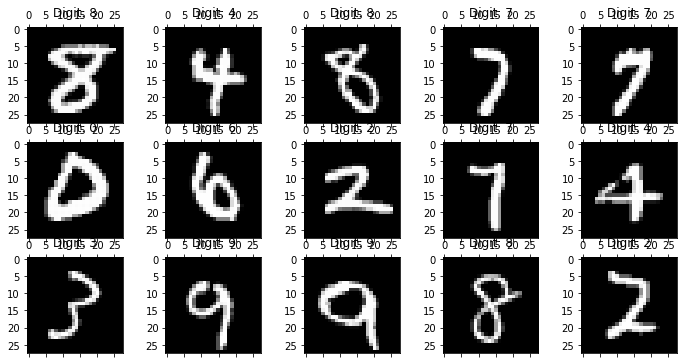

In [24]:
plt.gray()
fig = plt.figure( figsize=(12,6) )
for i in range(0,15):
    ax = fig.add_subplot(3,5,i+1, title="Digit: {}".format(str(df.loc[rndperm[i],'label'])) )
    ax.matshow(df.loc[rndperm[i],feat_cols].values.reshape((28,28)).astype(float))
plt.show()

In [17]:
pca = PCA(n_components=3)
pca_result = pca.fit_transform(df[feat_cols].values)
df['pca-one'] = pca_result[:,0]
df['pca-two'] = pca_result[:,1] 
df['pca-three'] = pca_result[:,2]
print('Explained variation per principal component: {}'.format(pca.explained_variance_ratio_))

Explained variation per principal component: [0.09746116 0.07155445 0.06149531]


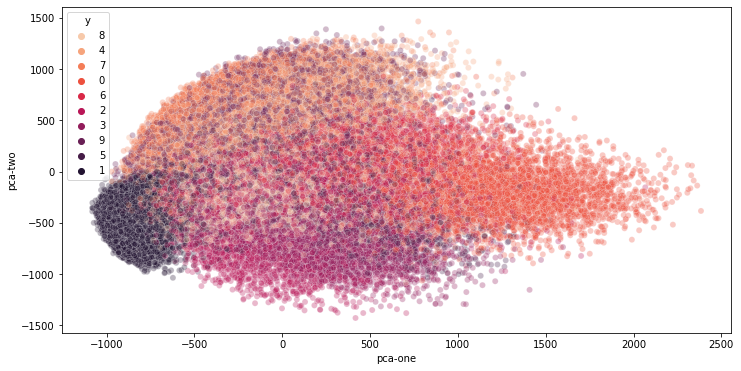

In [27]:
plt.figure(figsize=(12,6))
sns.scatterplot(
    x="pca-one", y="pca-two",
    hue="y",
    palette=sns.color_palette("rocket_r", 10),
    data=df.loc[rndperm,:],
    legend="full",
    alpha=0.3
)

From the graph we can see the two components definitely hold some information, especially for specific digits, but clearly not enough to set all of them apart.

In [29]:
#t-sne
N = 10000
df_subset = df.loc[rndperm[:N],:].copy()
data_subset = df_subset[feat_cols].values
pca = PCA(n_components=3)
pca_result = pca.fit_transform(data_subset)
df_subset['pca-one'] = pca_result[:,0]
df_subset['pca-two'] = pca_result[:,1] 
df_subset['pca-three'] = pca_result[:,2]
print('Explained variation per principal component: {}'.format(pca.explained_variance_ratio_))

Explained variation per principal component: [0.09819946 0.07123677 0.06113222]


In [30]:
time_start = time.time()
tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300)
tsne_results = tsne.fit_transform(data_subset)
print('t-SNE done! Time elapsed: {} seconds'.format(time.time()-time_start))

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 10000 samples in 1.556s...
[t-SNE] Computed neighbors for 10000 samples in 177.036s...
[t-SNE] Computed conditional probabilities for sample 1000 / 10000
[t-SNE] Computed conditional probabilities for sample 2000 / 10000
[t-SNE] Computed conditional probabilities for sample 3000 / 10000
[t-SNE] Computed conditional probabilities for sample 4000 / 10000
[t-SNE] Computed conditional probabilities for sample 5000 / 10000
[t-SNE] Computed conditional probabilities for sample 6000 / 10000
[t-SNE] Computed conditional probabilities for sample 7000 / 10000
[t-SNE] Computed conditional probabilities for sample 8000 / 10000
[t-SNE] Computed conditional probabilities for sample 9000 / 10000
[t-SNE] Computed conditional probabilities for sample 10000 / 10000
[t-SNE] Mean sigma: 438.329018
[t-SNE] KL divergence after 250 iterations with early exaggeration: 86.306229
[t-SNE] KL divergence after 300 iterations: 2.830281
t-SNE done! Time elap

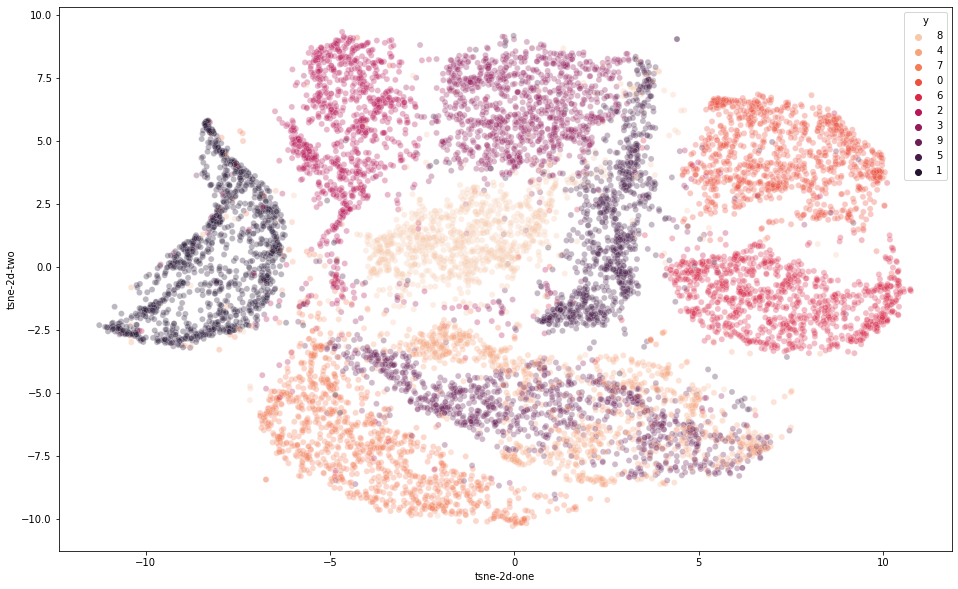

In [32]:
df_subset['tsne-2d-one'] = tsne_results[:,0]
df_subset['tsne-2d-two'] = tsne_results[:,1]
plt.figure(figsize=(16,10))
sns.scatterplot(
    x="tsne-2d-one", y="tsne-2d-two",
    hue="y",
    palette=sns.color_palette("rocket_r", 10),
    data=df_subset,
    legend="full",
    alpha=0.3
)

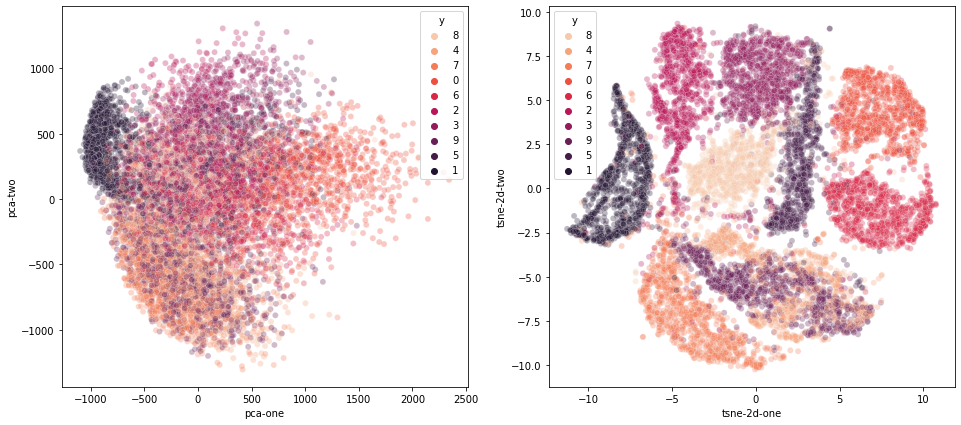

In [34]:
plt.figure(figsize=(16,7))
ax1 = plt.subplot(1, 2, 1)
sns.scatterplot(
    x="pca-one", y="pca-two",
    hue="y",
    palette=sns.color_palette("rocket_r", 10),
    data=df_subset,
    legend="full",
    alpha=0.3,
    ax=ax1
)
ax2 = plt.subplot(1, 2, 2)
sns.scatterplot(
    x="tsne-2d-one", y="tsne-2d-two",
    hue="y",
    palette=sns.color_palette("rocket_r", 10),
    data=df_subset,
    legend="full",
    alpha=0.3,
    ax=ax2
)

In [35]:
pca_50 = PCA(n_components=50)
pca_result_50 = pca_50.fit_transform(data_subset)
print('Cumulative explained variation for 50 principal components: {}'.format(np.sum(pca_50.explained_variance_ratio_)))

Cumulative explained variation for 50 principal components: 0.8261610590761407


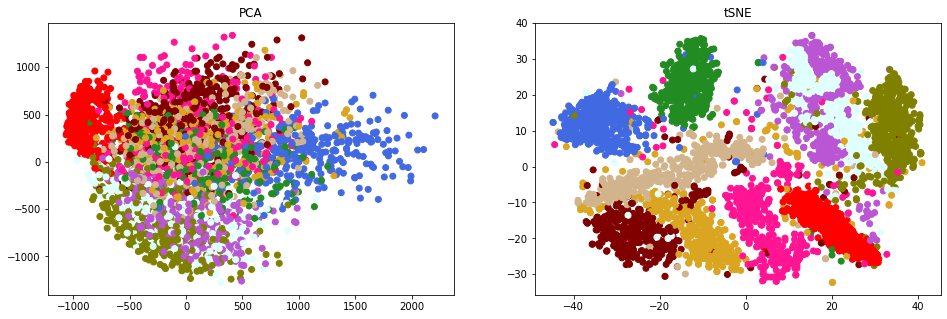

In [ ]:
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split

mnist = fetch_openml('mnist_784', version=1)
mnist.target = mnist.target.astype(np.uint8)
X = mnist["data"]
y = mnist["target"]

X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.95)

pca = PCA(n_components=2)
X_PCA=pca.fit_transform(X_train)

tsne = TSNE(n_components=2,perplexity=100, random_state=42)
X_100 = tsne.fit_transform(X_train)

plt.figure(figsize=(16, 5))
ax1=plt.subplot(121)
plt.gca().set_title('PCA')
scatter=plt.scatter(X_PCA[:,0], X_PCA[:,1],c=vectorizer(y_train),label=colors)
ax2=plt.subplot(122)
plt.gca().set_title('tSNE')
plt.scatter(X_100[:,0], X_100[:,1],c=vectorizer(y_train),label=y_train)

##Making Swiss Roll

In [ ]:
from sklearn.datasets import make_swiss_roll
X, t = make_swiss_roll(n_samples=1000, noise=0.2, random_state=42)

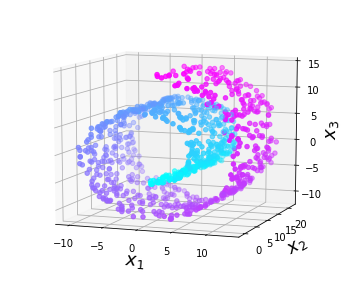

In [ ]:
axes = [-11.5, 14, -2, 23, -12, 15]

fig = plt.figure(figsize=(6, 5))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=t, cmap=plt.cm.cool)
ax.view_init(10, -70)
ax.set_xlabel("$x_1$", fontsize=18)
ax.set_ylabel("$x_2$", fontsize=18)
ax.set_zlabel("$x_3$", fontsize=18)
ax.set_xlim(axes[0:2])
ax.set_ylim(axes[2:4])
ax.set_zlim(axes[4:6])

plt.show()

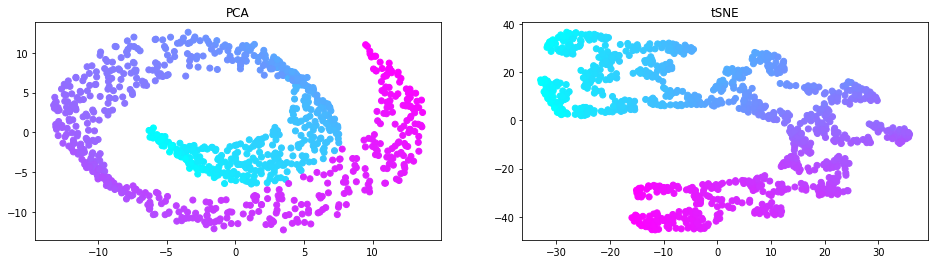

In [ ]:
pca = PCA(n_components=2)
X_PCA=pca.fit_transform(X)
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X)

plt.figure(figsize=(16, 4))
plt.subplot(121)
plt.gca().set_title('PCA')
plt.scatter(X_PCA[:,0], X_PCA[:,1],c=t, cmap=plt.cm.cool)
plt.subplot(122)
plt.gca().set_title('tSNE')
plt.scatter(X_tsne[:,0], X_tsne[:,1],c=t, cmap=plt.cm.cool)

#LLE Dimensionality Reduction

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import numpy as np

In [ ]:
def make_hello(N=1000, rseed=42):
    # Make a plot with "HELLO" text; save as PNG
    fig, ax = plt.subplots(figsize=(4, 1))
    fig.subplots_adjust(left=0, right=1, bottom=0, top=1)
    ax.axis('off')
    ax.text(0.5, 0.4, 'HELLO', va='center', ha='center', weight='bold', size=85)
    fig.savefig('hello.png')
    plt.close(fig)
    
    # Open this PNG and draw random points from it
    from matplotlib.image import imread
    data = imread('hello.png')[::-1, :, 0].T
    rng = np.random.RandomState(rseed)
    X = rng.rand(4 * N, 2)
    i, j = (X * data.shape).astype(int).T
    mask = (data[i, j] < 1)
    X = X[mask]
    X[:, 0] *= (data.shape[0] / data.shape[1])
    X = X[:N]
    return X[np.argsort(X[:, 0])]

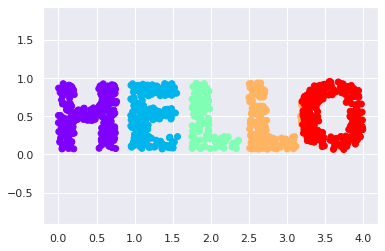

In [ ]:
X = make_hello(1000)
colorize = dict(c=X[:, 0], cmap=plt.cm.get_cmap('rainbow', 5))
plt.scatter(X[:, 0], X[:, 1], **colorize)
plt.axis('equal');

In [ ]:
def make_hello_s_curve(X):
    t = (X[:, 0] - 2) * 0.75 * np.pi
    x = np.sin(t)
    y = X[:, 1]
    z = np.sign(t) * (np.cos(t) - 1)
    return np.vstack((x, y, z)).T

XS = make_hello_s_curve(X)

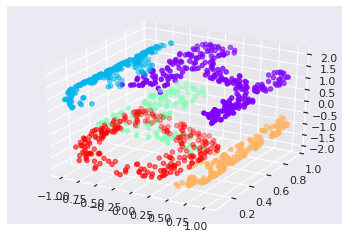

In [ ]:
from mpl_toolkits import mplot3d
ax = plt.axes(projection='3d')
ax.scatter3D(XS[:, 0], XS[:, 1], XS[:, 2],
             **colorize);

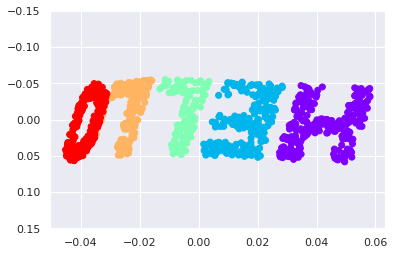

In [ ]:
from sklearn.manifold import LocallyLinearEmbedding
model = LocallyLinearEmbedding(n_neighbors=100, n_components=2, method='modified',
                               eigen_solver='dense')
out = model.fit_transform(XS)

fig, ax = plt.subplots()
ax.scatter(out[:, 0], out[:, 1], **colorize)
ax.set_ylim(0.15, -0.15);

## **UMAP**

UMAP is a nonlinear dimensionality reduction method, it is very effective for visualizing clusters or groups of data points and their relative proximities.

##The UMAP Reducer
Once you’ve imported the MNIST digits, you can use the UMAP reducer on the MNIST training set images to create an embedding

In [ ]:
!pip install scprep phate umap-learn

     |████████████████████████████████| 104 kB 5.3 MB/s 
     |████████████████████████████████| 80 kB 9.4 MB/s 
     |████████████████████████████████| 416 kB 45.2 MB/s 
     |████████████████████████████████| 45 kB 3.3 MB/s 
     |████████████████████████████████| 1.8 MB 40.0 MB/s 
     |████████████████████████████████| 1.1 MB 73.1 MB/s 
  Created wheel for umap-learn: filename=umap_learn-0.5.1-py3-none-any.whl size=76564 sha256=cfcf907eacbeb5eb733d8b29dd6433f2eb96ad4b37fd16bc3b5d79e16e48fc60
  Stored in directory: /root/.cache/pip/wheels/01/e7/bb/347dc0e510803d7116a13d592b10cc68262da56a8eec4dd72f
  Created wheel for pynndescent: filename=pynndescent-0.5.5-py3-none-any.whl size=52603 sha256=a1e8ab139308b6487f29eb48c7a71f4422f5b123b984323dac363c174b193c1e
  Stored in directory: /root/.cache/pip/wheels/af/e9/33/04db1436df0757c42fda8ea6796d7a8586e23c85fac355f476
Successfully built umap-learn pynndescent


In [ ]:
import scprep
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

MNIST Dataset Shape:
X_train: (60000, 28, 28)
Y_train: (60000,)
X_test:  (10000, 28, 28)
Y_test:  (10000,)


Sample #: 46244
MNIST Number: 5




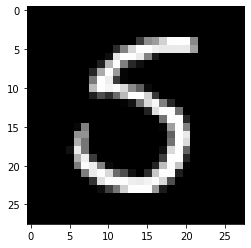

In [ ]:
# import the mnist digits using tensorflow
from tensorflow.keras.datasets import mnist
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

# display sample digits
# - import libraries
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
# - display data shapes
print('MNIST Dataset Shape:')
print('X_train: ' + str(X_train.shape))
print('Y_train: ' + str(Y_train.shape))
print('X_test:  '  + str(X_test.shape))
print('Y_test:  '  + str(Y_test.shape))
print('\n')
# - randomly pick a sample image
# sample = np.random.randint(low=0, high=len(X_train))
# - pick a sample image
sample = 46244
print('Sample #: ' + str(sample))
print('MNIST Number: ' + str(Y_train[sample]))
print('\n')
image = X_train[sample]

# - plot the sample image
fig = plt.figure
plt.imshow(image, cmap='gray')
plt.show()

In [ ]:
# import the UMAP library
import umap

# create a UMAP reducer that will compress the data
reducer = umap.UMAP()

# get information about number of samples, rows, and columns in the dataset. 
# note the shape of each variable in the output above 
nsamples, nx, ny = X_train.shape

# reshape the data to comply with UMAP reducer requirements
X_train_2 = X_train.reshape((nsamples,nx*ny))

# create an embedding using the fit_transform function. 
embedding = reducer.fit_transform(X_train_2)

# display the embedding shape
print(np.shape(embedding))

/usr/local/lib/python3.7/dist-packages/numba/np/ufunc/parallel.py:363: NumbaWarning: The TBB threading layer requires TBB version 2019.5 or later i.e., TBB_INTERFACE_VERSION >= 11005. Found TBB_INTERFACE_VERSION = 9107. The TBB threading layer is disabled.
  warnings.warn(problem)


(60000, 2)


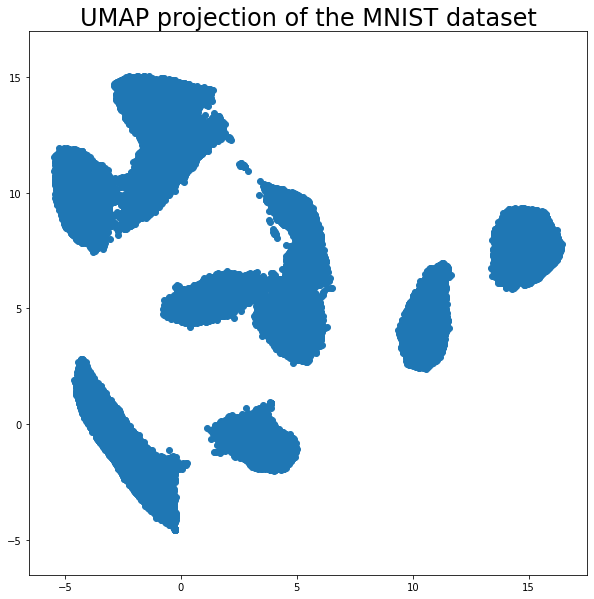

In [ ]:
import seaborn as sns

plt.figure(figsize=[10,10])
plt.scatter(
    embedding[:, 0],
    embedding[:, 1])
plt.gca().set_aspect('equal', 'datalim')
plt.title('UMAP projection of the MNIST dataset', fontsize=24)
plt.show()

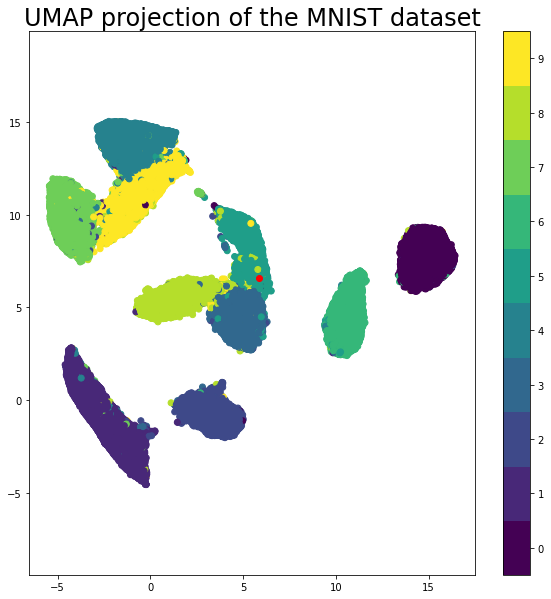

In [ ]:
import seaborn as sns

plt.figure(figsize=[10,10])
plt.scatter(
    embedding[:, 0],
    embedding[:, 1],
    c=Y_train
)
plt.gca().set_aspect('equal', 'datalim')
plt.title('UMAP projection of the MNIST dataset', fontsize=24)
plt.colorbar(boundaries=np.arange(11)-0.5).set_ticks(np.arange(10))
plt.scatter(embedding[46244,0], embedding[46244,1],color='r')
plt.show()

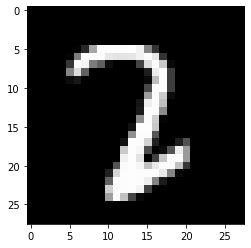

Expected value: 2


In [ ]:
# pick a random sample
sample = 4939

# - plot the sample image
fig = plt.figure
plt.imshow(X_test[sample], cmap='gray')
plt.show()

# print the expected numeric value
print('Expected value: ' + str(Y_test[sample]))

In [ ]:
# reshape the data to comply with UMAP reducer requirements
X_test_sample = X_test[sample].reshape((1,nx*ny))

# create an embedding using the fit_transform function. 
embedding_2 = reducer.transform(X_test_sample)

# display the embedding shape
print(np.shape(embedding_2))

(1, 2)


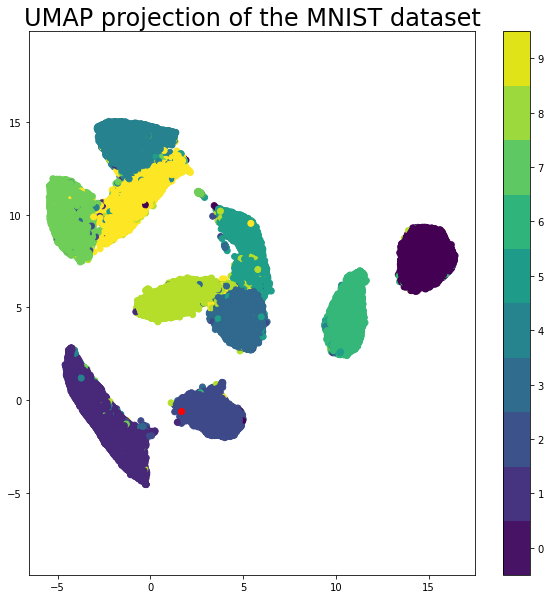

In [ ]:
# plot the training data and overlayed test sample
plt.figure(figsize=[10,10])
plt.scatter(
    embedding[:, 0],
    embedding[:, 1],
    c=Y_train
)
plt.scatter(
    embedding_2[:, 0],
    embedding_2[:, 1],
    color='r'
)
plt.gca().set_aspect('equal', 'datalim')
plt.title('UMAP projection of the MNIST dataset', fontsize=24)
plt.colorbar(boundaries=np.arange(11)-0.5).set_ticks(np.arange(10))
plt.show()

In [ ]:
# create a UMAP reducer that will compress the data
reducer3D = umap.UMAP(n_components=3)

# get information about number of samples, rows, and columns in the dataset. 
# note the shape of each variable in the output above 
nsamples, nx, ny = X_train.shape

# reshape the data to comply with UMAP reducer requirements
X_train_2 = X_train.reshape((nsamples,nx*ny))

# create an embedding using the fit_transform function. 
embedding3D = reducer3D.fit_transform(X_train_2)

# display the embedding shape
print(np.shape(embedding3D))

(60000, 3)


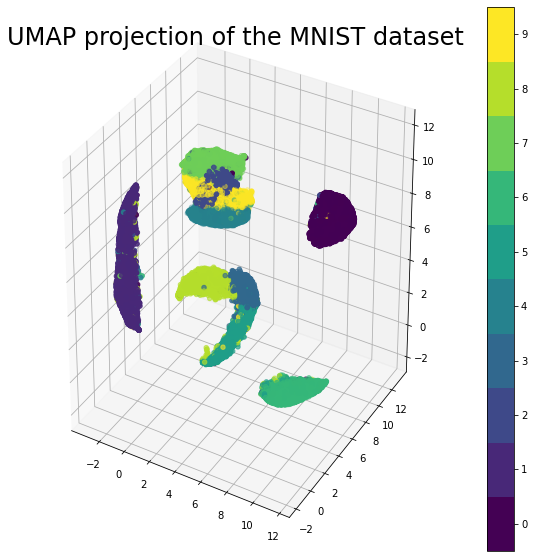

In [ ]:
fig = plt.figure(figsize=[10,10])
ax = plt.axes(projection ="3d")
p = ax.scatter(
    embedding3D[:, 0],
    embedding3D[:, 1],
    embedding3D[:, 2],
    c=Y_train
)
plt.title('UMAP projection of the MNIST dataset', fontsize=24)
fig.colorbar(p,boundaries=np.arange(11)-0.5).set_ticks(np.arange(10))
plt.show()

#Dimensionality Reduction on Tabular Data

In [ ]:
%matplotlib inline
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns

In [ ]:
sns.set()
sns.set(rc={"figure.figsize": (10, 8)})

In [ ]:
PALETTE = sns.color_palette('deep', n_colors=3)
CMAP = ListedColormap(PALETTE.as_hex())

In [ ]:
RANDOM_STATE = 42

#Load Dataset

In [ ]:
dataset = load_iris()

In [ ]:
features = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
target = 'species'

In [ ]:
iris = pd.DataFrame(
    dataset.data,
    columns=features)

In [ ]:
iris[target] = dataset.target

In [ ]:
iris.head()

sepal_length  sepal_width  petal_length  petal_width  species
0           5.1          3.5           1.4          0.2        0
1           4.9          3.0           1.4          0.2        0
2           4.7          3.2           1.3          0.2        0
3           4.6          3.1           1.5          0.2        0
4           5.0          3.6           1.4          0.2        0

##Defining plotting fuctions

In [ ]:
def plot_iris_2d(x, y, title, xlabel="1st eigenvector", ylabel="2nd eigenvector"):
    sns.set_style("darkgrid")
    
    plt.scatter(x, y,
        c=iris['species'],
        cmap=CMAP,
        s=70)
    
    plt.title(title, fontsize=20, y=1.03)

    plt.xlabel(xlabel, fontsize=16)
    plt.ylabel(ylabel, fontsize=16)

In [ ]:
def plot_iris_3d(x, y, z, title):
    sns.set_style('whitegrid')
    
    fig = plt.figure(1, figsize=(8, 6))
    ax = Axes3D(fig, elev=-150, azim=110)
    
    ax.scatter(x, y, z,
               c=iris['species'],
               cmap=CMAP,
               s=40)
    
    ax.set_title(title, fontsize=20, y=1.03)
    
    fsize = 14
    ax.set_xlabel("1st eigenvector", fontsize=fsize)
    ax.set_ylabel("2nd eigenvector", fontsize=fsize)
    ax.set_zlabel("3rd eigenvector", fontsize=fsize)
    
    ax.w_xaxis.set_ticklabels([])
    ax.w_yaxis.set_ticklabels([])
    ax.w_zaxis.set_ticklabels([])

##Plotting first two componenets

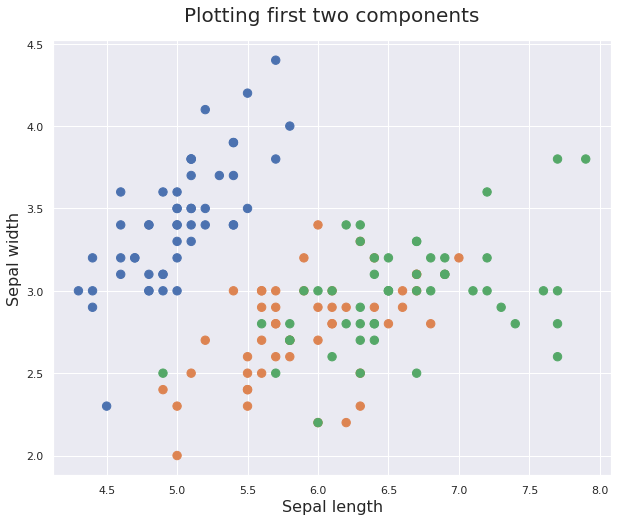

In [ ]:
plot_iris_2d(
    x = iris['sepal_length'],
    y = iris['sepal_width'],
    title = 'Plotting first two components',
    xlabel = 'Sepal length',
    ylabel = 'Sepal width')

##2D Plotting with PCA

In [ ]:
pca = PCA(n_components=2)
points = pca.fit_transform(iris[features])

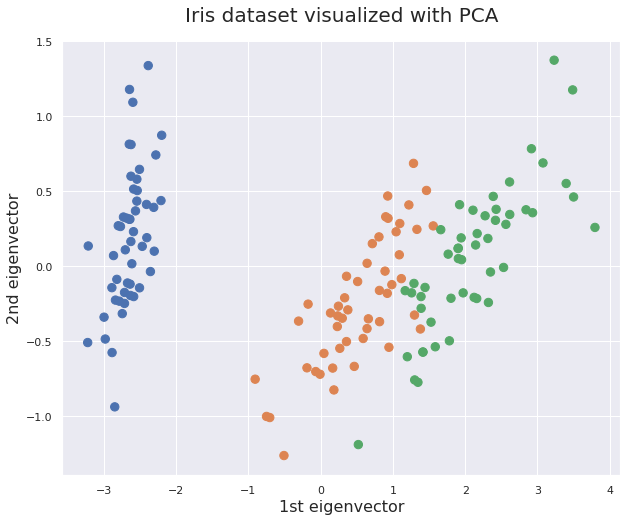

In [ ]:
plot_iris_2d(
    x = points[:,0],
    y = points[:,1],
    title = 'Iris dataset visualized with PCA')

## 2D plotting with t-SNE

In [ ]:
tsne = TSNE(n_components=2, n_iter=1000, random_state=RANDOM_STATE)
points = tsne.fit_transform(iris[features])

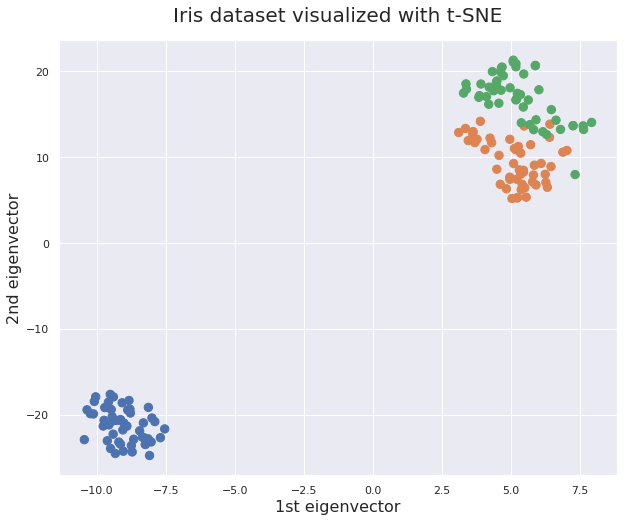

In [ ]:
plot_iris_2d(
    x = points[:, 0],
    y = points[:, 1],
    title = 'Iris dataset visualized with t-SNE')

##3D plotting with PCA

In [ ]:
pca = PCA(n_components=3)
points = pca.fit_transform(iris[features])

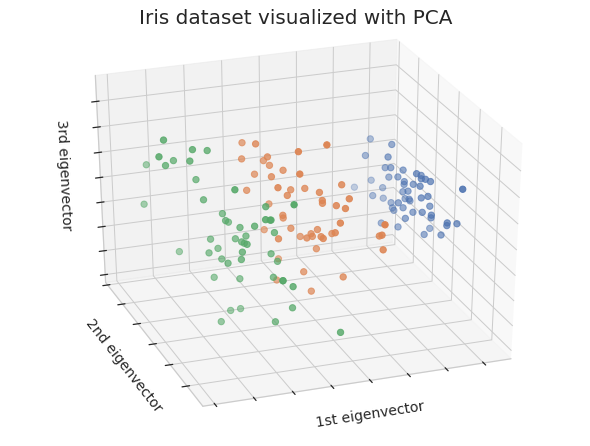

In [ ]:
plot_iris_3d(
    x = points[:,0],
    y = points[:,1],
    z = points[:,2],
    title = "Iris dataset visualized with PCA")

##3D plotting with t-SNE

In [ ]:
tsne = TSNE(n_components=3, n_iter=5000, random_state=RANDOM_STATE)
points = tsne.fit_transform(iris[features])

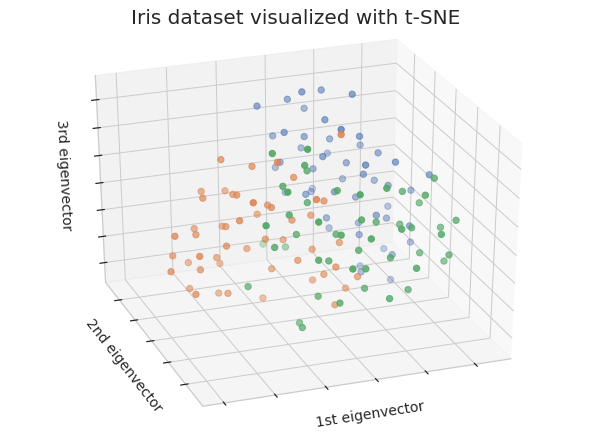

In [ ]:
plot_iris_3d(
    x = points[:,0],
    y = points[:,1],
    z = points[:,2],
    title = "Iris dataset visualized with t-SNE")

**STARTS HERE**

#**PCA**

###**Importing required libraries**

In [76]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [77]:
from google.colab import drive
drive.mount('/content/drive/')
df_iris_data = pd.read_csv('/content/drive/MyDrive/Data Mining Assignment 1/Iris.csv')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [78]:
df_iris_data.head()

Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0   1            5.1           3.5            1.4           0.2  Iris-setosa
1   2            4.9           3.0            1.4           0.2  Iris-setosa
2   3            4.7           3.2            1.3           0.2  Iris-setosa
3   4            4.6           3.1            1.5           0.2  Iris-setosa
4   5            5.0           3.6            1.4           0.2  Iris-setosa

In [79]:
df_iris_data.describe()

Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
count  150.000000     150.000000    150.000000     150.000000    150.000000
mean    75.500000       5.843333      3.054000       3.758667      1.198667
std     43.445368       0.828066      0.433594       1.764420      0.763161
min      1.000000       4.300000      2.000000       1.000000      0.100000
25%     38.250000       5.100000      2.800000       1.600000      0.300000
50%     75.500000       5.800000      3.000000       4.350000      1.300000
75%    112.750000       6.400000      3.300000       5.100000      1.800000
max    150.000000       7.900000      4.400000       6.900000      2.500000

In [80]:
df_iris_data.shape

(150, 6)

In [81]:
X_variables = df_iris_data.iloc[:,1:5]
X_variables

SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
0              5.1           3.5            1.4           0.2
1              4.9           3.0            1.4           0.2
2              4.7           3.2            1.3           0.2
3              4.6           3.1            1.5           0.2
4              5.0           3.6            1.4           0.2
..             ...           ...            ...           ...
145            6.7           3.0            5.2           2.3
146            6.3           2.5            5.0           1.9
147            6.5           3.0            5.2           2.0
148            6.2           3.4            5.4           2.3
149            5.9           3.0            5.1           1.8

[150 rows x 4 columns]

In [82]:
y_variable = df_iris_data.iloc[:,5]
y_variable

0         Iris-setosa
1         Iris-setosa
2         Iris-setosa
3         Iris-setosa
4         Iris-setosa
            ...      
145    Iris-virginica
146    Iris-virginica
147    Iris-virginica
148    Iris-virginica
149    Iris-virginica
Name: Species, Length: 150, dtype: object

In [83]:
sc = StandardScaler()
transformed_df = sc.fit_transform(X_variables)

In [84]:
covariance_matrix = np.cov(transformed_df.T)

In [85]:

covariance_matrix

array([[ 1.00671141, -0.11010327,  0.87760486,  0.82344326],
       [-0.11010327,  1.00671141, -0.42333835, -0.358937  ],
       [ 0.87760486, -0.42333835,  1.00671141,  0.96921855],
       [ 0.82344326, -0.358937  ,  0.96921855,  1.00671141]])

In [86]:
eigen_values, eigen_vectors = np.linalg.eig(covariance_matrix)

In [87]:
eigen_pairs = [(np.abs(eigen_values[i]), eigen_vectors[:,i]) for i in range(len(eigen_values))]
print('Eigenvalues arranged in descending order:')
for i in eigen_pairs:
    print(i[0])

Eigenvalues arranged in descending order:
2.930353775589317
0.9274036215173428
0.14834222648163967
0.020746013995595967


In [88]:
pca = PCA()

In [89]:
pca = pca.fit(transformed_df)

In [90]:
explained_variance = pca.explained_variance_ratio_

In [91]:
explained_variance

array([0.72770452, 0.23030523, 0.03683832, 0.00515193])

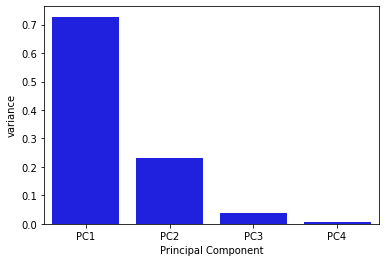

In [92]:
dataframe = pd.DataFrame({'variance':pca.explained_variance_ratio_,
             'Principal Component':['PC1','PC2','PC3','PC4']})
sns.barplot(x='Principal Component',y="variance", 
           data=dataframe, color="b");

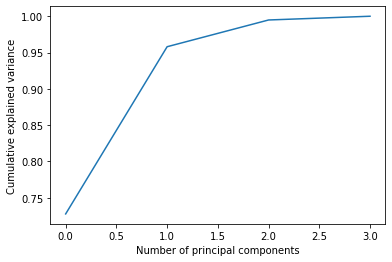

In [93]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of principal components')
plt.ylabel('Cumulative explained variance')
plt.show()

In [94]:
start = time.time()
pca_2 = PCA(n_components =2 )
pca_2 = pca_2.fit(transformed_df)
pca_2d = pca_2.transform(X_variables)
print('Duration: {} seconds'.format(time.time() - start))

Duration: 0.0036847591400146484 seconds


In [95]:
df_iris_data['Species'] = df_iris_data['Species'].replace({'Iris-setosa':0, 'Iris-versicolor':1, 'Iris-virginica':2})

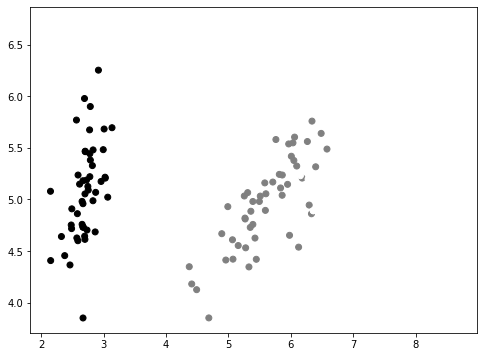

In [96]:
plt.figure(figsize=(8,6))

plt.scatter(pca_2d[:,0], pca_2d[:,1],c=df_iris_data['Species'])
plt.show()

In [97]:
start = time.time()
pca_4 = PCA(n_components =4 )
pca_4 = pca_4.fit(transformed_df)
pca_4d = pca_4.transform(X_variables)
print('Duration: {} seconds'.format(time.time() - start))

Duration: 0.004128932952880859 seconds


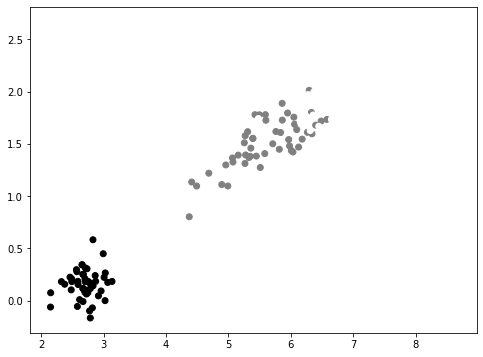

In [98]:
plt.figure(figsize=(8,6))

plt.scatter(pca_4d[:,0], pca_4d[:,3],c=df_iris_data['Species'])
plt.show()

#**SVD**

In [43]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler

In [44]:
from google.colab import drive
drive.mount('/content/drive/')
df_svd_data = pd.read_csv('/content/drive/MyDrive/Data Mining Assignment 1/Iris.csv')

Mounted at /content/drive/


In [45]:
df_svd_data.shape

(150, 6)

In [46]:
df_svd_data.head()

Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0   1            5.1           3.5            1.4           0.2  Iris-setosa
1   2            4.9           3.0            1.4           0.2  Iris-setosa
2   3            4.7           3.2            1.3           0.2  Iris-setosa
3   4            4.6           3.1            1.5           0.2  Iris-setosa
4   5            5.0           3.6            1.4           0.2  Iris-setosa

In [47]:
encoder = LabelEncoder()

In [48]:
for col in df_svd_data.columns:
    df_svd_data[col] = encoder.fit_transform(df_svd_data[col])

In [49]:
X_variables = df_svd_data.iloc[:,1:5]
y_label = df_svd_data.iloc[:,5]

In [50]:
scaler = StandardScaler()
X_features = scaler.fit_transform(X_variables)

In [51]:
start = time.time()
u, s, v = np.linalg.svd(X_features, full_matrices=True)
print('Duration: {} seconds'.format(time.time() - start))

Duration: 0.013459444046020508 seconds


In [ ]:
u.shape

(150, 150)

In [ ]:
s.shape

(4,)

In [ ]:
v.shape

(4, 4)

Text(0, 0.5, 'Percent of the variance explained')

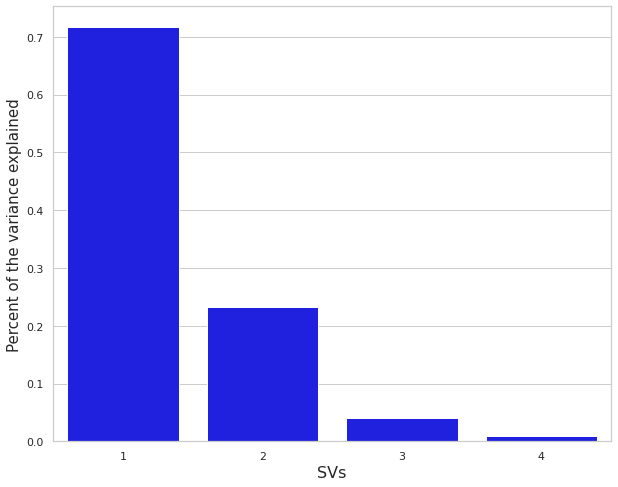

In [ ]:
variance_explained = np.round(s**2/np.sum(s**2), decimals=3)
variance_explained
 
sns.barplot(x=list(range(1,len(variance_explained)+1)),
            y=variance_explained, color="blue")
plt.xlabel('SVs', fontsize=16)
plt.ylabel('Percent of the variance explained', fontsize=15)

In [ ]:
col_labels= ['SV'+str(i) for i in range(1,3)]
svd_df = pd.DataFrame(u[:,0:2], index=y_label.tolist(), columns=col_labels)
svd_df=svd_df.reset_index()
svd_df.rename(columns={'index':'Class'}, inplace=True)
svd_df.head()

Class       SV1       SV2
0      0 -0.103073 -0.052278
1      0 -0.097213  0.047940
2      0 -0.110944  0.016190
3      0 -0.106858  0.037052
4      0 -0.108729 -0.068371

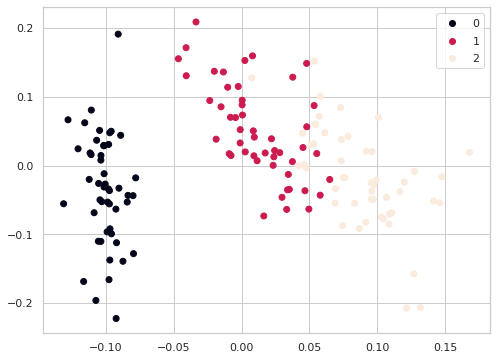

In [ ]:
plt.figure(figsize=(8,6))

scatter = plt.scatter(svd_df['SV1'],svd_df['SV2'],c=svd_df['Class'])
plt.legend(*scatter.legend_elements())

#**TSNE**

###**Importing required libraries**

In [40]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn import datasets
from sklearn.decomposition import PCA


import sklearn.datasets
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [41]:
iris = datasets.load_iris()
X = iris.data
y = iris.target

In [42]:
start = time.time()
tsne = TSNE(n_components=3, verbose=1, perplexity=40, n_iter=300)
tsne_results = tsne.fit_transform(X)
print('Duration: {} seconds'.format(time.time() - start))

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 150 samples in 0.000s...
[t-SNE] Computed neighbors for 150 samples in 0.011s...
[t-SNE] Computed conditional probabilities for sample 150 / 150
[t-SNE] Mean sigma: 0.667454
[t-SNE] KL divergence after 250 iterations with early exaggeration: 95.721626
[t-SNE] KL divergence after 300 iterations: 2.201331
Duration: 0.8414738178253174 seconds


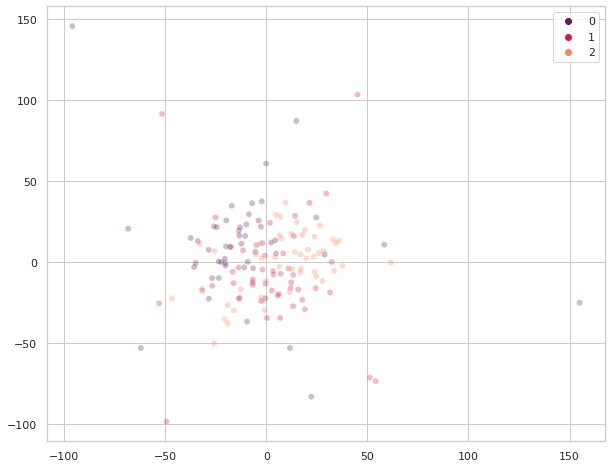

In [ ]:
tsne_1 = tsne_results[:,0]
tsne_2 = tsne_results[:,1]
#plt.figure(figsize=(16,10))
sns.scatterplot(
    x=tsne_1, y=tsne_2,
    hue=y,
    palette=sns.color_palette("rocket", 3),
    data=X,
    legend="full",
    alpha=0.3
)



#**ISOMAP**

In [38]:
from sklearn import manifold, datasets

In [39]:
iris = datasets.load_iris()
start = time.time()
isomap = manifold.Isomap(n_components=2)
new_dim = isomap.fit_transform(iris.data)
print('Duration: {} seconds'.format(time.time() - start))

Duration: 0.024313688278198242 seconds


In [ ]:
df = pd.DataFrame(new_dim, columns=['X', 'Y'])
df['label'] = iris.target
df.head()

X         Y  label
0  0.118155  0.381038      0
1  0.113729  0.323243      0
2  0.113922  0.325955      0
3  0.113904  0.325207      0
4  0.117613  0.372992      0

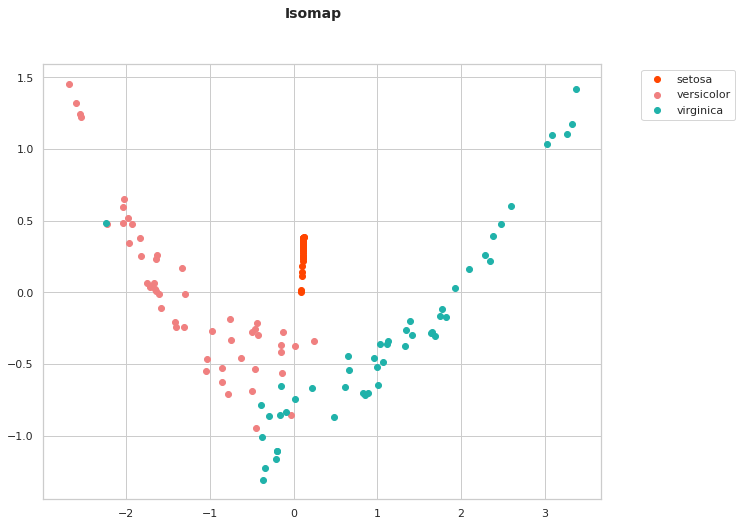

In [ ]:
fig = plt.figure()
fig.suptitle('Isomap', fontsize=14, fontweight='bold')
ax = fig.add_subplot(111)
N = 50
plt.scatter(df[df.label == 0].X, df[df.label == 0].Y, color='orangered', label=iris.target_names[0])
plt.scatter(df[df.label == 1].X, df[df.label == 1].Y, color='lightcoral', label=iris.target_names[1])
plt.scatter(df[df.label == 2].X, df[df.label == 2].Y, color='lightseagreen', label=iris.target_names[2])

plt.legend(bbox_to_anchor=(1.25, 1))

#**LLE**

In [36]:
from sklearn.datasets import load_digits
from sklearn.manifold import LocallyLinearEmbedding
start = time.time()
embedding = LocallyLinearEmbedding(n_components=2)
print('Duration: {} seconds'.format(time.time() - start))

Duration: 6.866455078125e-05 seconds


In [ ]:
X_transformed = embedding.fit_transform(X)

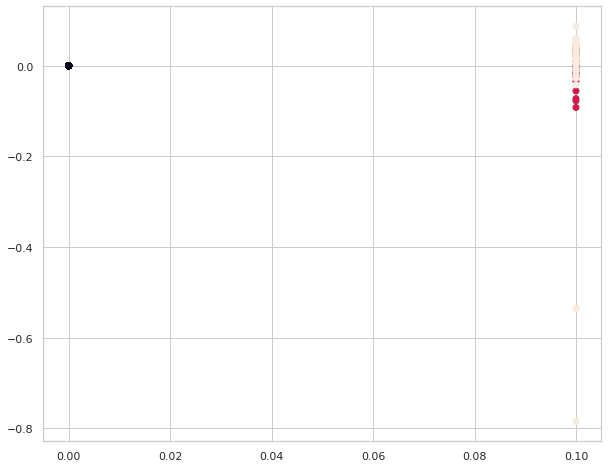

In [ ]:
scatter = plt.scatter(X_transformed.T[0], X_transformed.T[1],c=y)

#**UMAP**

In [ ]:
!pip install umap-learn

     |████████████████████████████████| 86 kB 2.0 MB/s 
     |████████████████████████████████| 1.1 MB 36.4 MB/s 
  Created wheel for umap-learn: filename=umap_learn-0.5.2-py3-none-any.whl size=82709 sha256=8be688b9c753c1d22c95ae9de0c107b7d856d4ad9cb8fd1673ca237d33138873
  Stored in directory: /root/.cache/pip/wheels/84/1b/c6/aaf68a748122632967cef4dffef68224eb16798b6793257d82
  Created wheel for pynndescent: filename=pynndescent-0.5.5-py3-none-any.whl size=52603 sha256=c45506591a149f06e661faccf3dc1c8f22b9c3ee07f1b7cfb92bf9e9a6901040
  Stored in directory: /root/.cache/pip/wheels/af/e9/33/04db1436df0757c42fda8ea6796d7a8586e23c85fac355f476
Successfully built umap-learn pynndescent


In [ ]:
import umap
import time
start = time.time()
reducer = umap.UMAP(random_state=42,n_components=3)
embedding = reducer.fit_transform(X)
print('Duration: {} seconds'.format(time.time() - start))

/usr/local/lib/python3.7/dist-packages/numba/np/ufunc/parallel.py:363: NumbaWarning: The TBB threading layer requires TBB version 2019.5 or later i.e., TBB_INTERFACE_VERSION >= 11005. Found TBB_INTERFACE_VERSION = 9107. The TBB threading layer is disabled.
  warnings.warn(problem)


Duration: 8.032112121582031 seconds


In [ ]:
mapper = umap.UMAP().fit(X)

In [ ]:
!pip install "umap-learn[plot]"
import colorcet
import holoviews as hv
import sklearn.decomposition
import umap.plot

     |████████████████████████████████| 15.8 MB 619 bytes/s 
     |████████████████████████████████| 76 kB 4.2 MB/s 
     |████████████████████████████████| 793 kB 37.9 MB/s 
     |████████████████████████████████| 132 kB 53.8 MB/s 
     |████████████████████████████████| 793 kB 58.9 MB/s 
     |████████████████████████████████| 791 kB 72.5 MB/s 
     |████████████████████████████████| 786 kB 34.5 MB/s 
     |████████████████████████████████| 779 kB 28.8 MB/s 
     |████████████████████████████████| 778 kB 58.9 MB/s 
     |████████████████████████████████| 776 kB 52.9 MB/s 
     |████████████████████████████████| 769 kB 54.8 MB/s 
     |████████████████████████████████| 766 kB 47.0 MB/s 
     |████████████████████████████████| 1.0 MB 57.5 MB/s 
     |████████████████████████████████| 722 kB 57.0 MB/s 
     |████████████████████████████████| 722 kB 42.6 MB/s 
     |████████████████████████████████| 715 kB 55.1 MB/s 
     |████████████████████████████████| 705 kB 59.3 MB/s 
     |███████

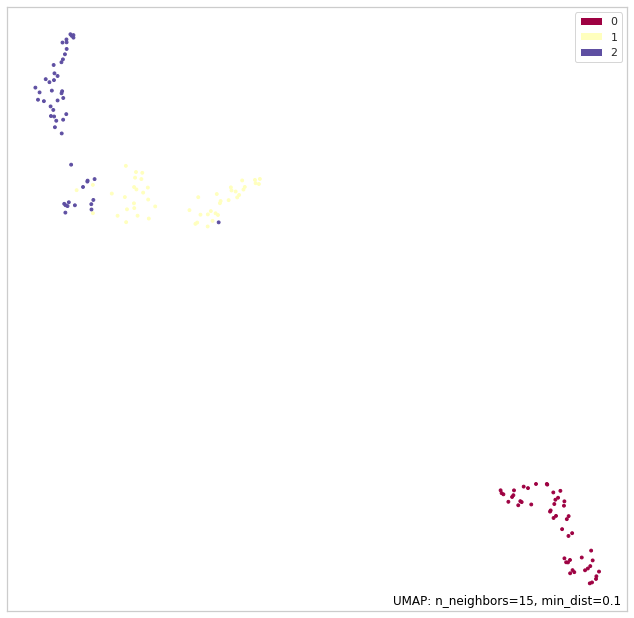

In [ ]:
umap.plot.points(mapper, labels=y)

# **Comparision:**



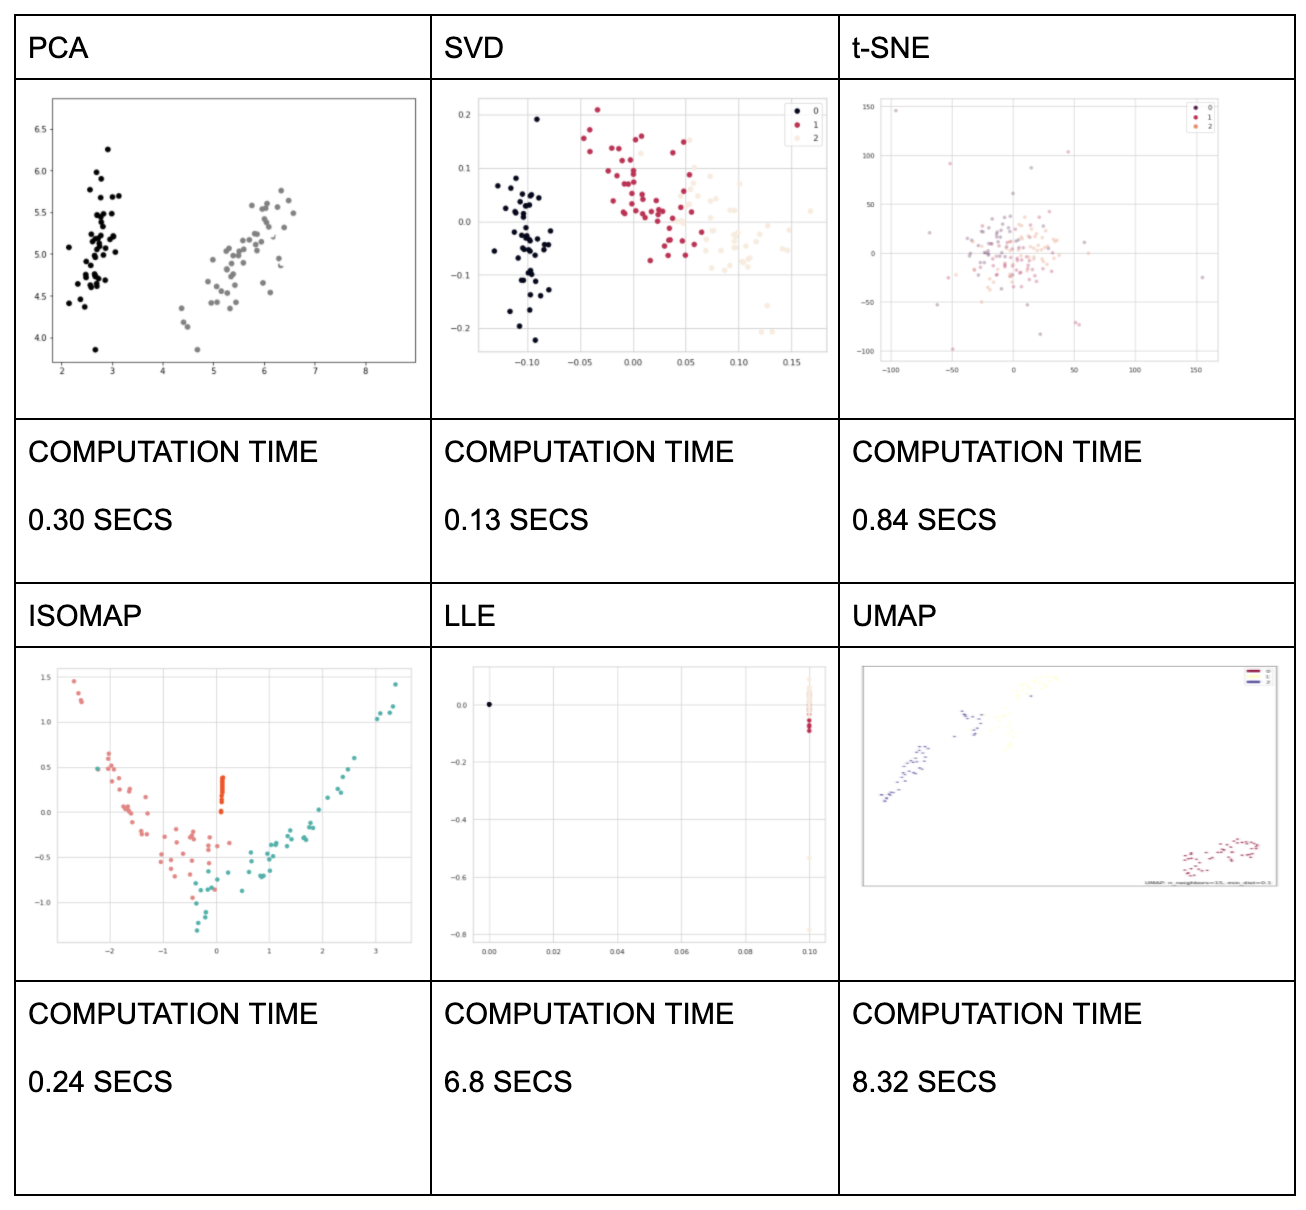

**PCA** - From the graph we can see the two components definitely hold some information, especially for mnist digits, but clearly not enough to set all of them apart. It fails to model nonlinear relationships because it is linear.

**t-SNE** - it is particularly well suited for the visualization of high-dimensional datasets. PCA it is not a mathematical technique but a probablistic one.  The way it does this is computationally quite heavy and therefore has limitations. In case of very high dimensional data, best to apply another dimensionality reduction technique before using t-SNE. Since t-SNE scales quadratically in the number of objects N, its applicability is limited to data sets with only a few thousand input objects,after that, learning becomes too slow to be practical. We can see that the mnist digits are very clearly clustered in their own sub groups here.

**UMAP** - We can clearly see that the UMAP does a great job in separating the data points compared to t-SNE and PCA in terms of separation. It outperforms t-SNE and PCA. By looking at the plots, we can see mini-clusters that are being separated well. It is very effective for visualizing clusters or groups of data points and their relative proximities. UMAP is much faster than t-SNE.

**ISOMAP** - tries to preserve geodesic distance, or distance measured not in Euclidean space but on the curved surface of the manifold.Isomap performs better than PCA.

**LLE** -  Better computational time as it tends to accumulate sparse matrices, it is more efficient than the other algorithms in terms of computational space and time. In terms of consideration of the non-linearity of the structure,
LLE goes beyond density modeling techniques such as local PCA. 
Similarly, other methods like Kernel PCA, Isomap are also unable to detect the features which are detected by LLE.

**SVD** - It clearly shows how the reconstructed image quality varies with different values of K. As we increase or decrease the k with the slider, the quality increases or decreases.